In [ ]:
#gdrive final files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/washpost/combo.csv'

Mounted at /content/drive


In [ ]:
#install packages
!pip install pandas
!pip install spacy

In [ ]:
#load spacy en
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

2023-12-11 15:15:33.175469: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 15:15:33.175534: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 15:15:33.175580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 15:15:35.133768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
df = pd.read_csv(file_path, encoding="utf-8")

#duplicate df to analyze punctuation
punctuation_df = df.copy()

In [ ]:
#define punctuation function for answers
def count_punctuation(text):
    doc = nlp(text)
    exclamation_count = text.count('!')
    question_count = text.count('?')
    comma_count = text.count(',')
    period_count = text.count('.')

    return exclamation_count, question_count, comma_count, period_count


In [ ]:
#apply
punctuation_df[['journo_exclamation', 'journo_question_count', 'journo_comma_count', 'journo_period_count']] = punctuation_df['answers'].apply(count_punctuation).apply(pd.Series)
punctuation_df[['gpt_exclamation', 'gpt_question', 'gpt_comma', 'gpt_period']] = punctuation_df['chatgpt'].apply(count_punctuation).apply(pd.Series)


In [ ]:
punctuation_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


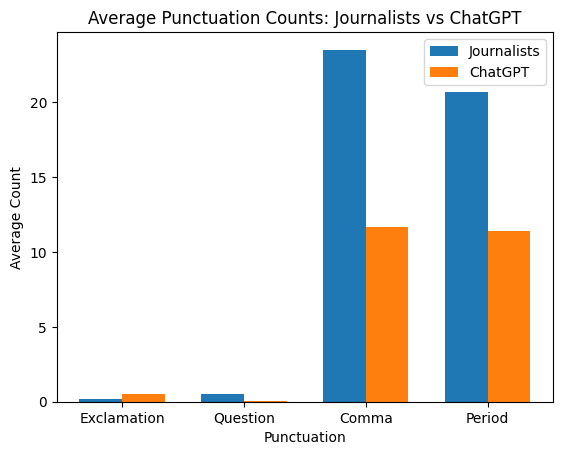

In [ ]:
import matplotlib.pyplot as plt

#calculate average punctuation counts for 'answers' and 'chatgpt'
avg_answers_punctuation = punctuation_df[['journo_exclamation', 'journo_question_count', 'journo_comma_count', 'journo_period_count']].mean()
avg_chatgpt_punctuation = punctuation_df[['gpt_exclamation', 'gpt_question', 'gpt_comma', 'gpt_period']].mean()

#create a bar chart
labels = ['Exclamation', 'Question', 'Comma', 'Period']
bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, avg_answers_punctuation, bar_width, label='Journalists')
bar2 = ax.bar([i + bar_width for i in index], avg_chatgpt_punctuation, bar_width, label='ChatGPT')

ax.set_xlabel('Punctuation')
ax.set_ylabel('Average Count')
ax.set_title('Average Punctuation Counts: Journalists vs ChatGPT')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


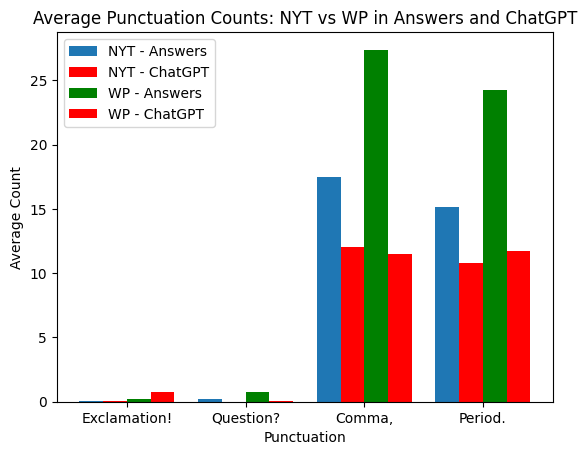

In [ ]:
#compare wp and nyt
#filter df New York Times (NYT) and Washington Post (WP)
nyt_df = punctuation_df[punctuation_df['source'] == 'NYT']
wp_df = punctuation_df[punctuation_df['source'] == 'WP']

#calculate average punctuation counts for NYT and WP in 'answers' and 'chatgpt'
avg_nyt_answers_punctuation = nyt_df[['journo_exclamation', 'journo_question_count', 'journo_comma_count', 'journo_period_count']].mean()
avg_nyt_chatgpt_punctuation = nyt_df[['gpt_exclamation', 'gpt_question', 'gpt_comma', 'gpt_period']].mean()

avg_wp_answers_punctuation = wp_df[['journo_exclamation', 'journo_question_count', 'journo_comma_count', 'journo_period_count']].mean()
avg_wp_chatgpt_punctuation = wp_df[['gpt_exclamation', 'gpt_question', 'gpt_comma', 'gpt_period']].mean()

#detailed bar chart
labels = ['Exclamation!', 'Question?', 'Comma,', 'Period.']
bar_width = 0.2
index = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, avg_nyt_answers_punctuation, bar_width, label='NYT - Answers')
bar2 = ax.bar([i + bar_width for i in index], avg_nyt_chatgpt_punctuation, bar_width, label='NYT - ChatGPT', color='red')
bar3 = ax.bar([i + 2*bar_width for i in index], avg_wp_answers_punctuation, bar_width, label='WP - Answers', color='green')
bar4 = ax.bar([i + 3*bar_width for i in index], avg_wp_chatgpt_punctuation, bar_width, label='WP - ChatGPT', color='red')

ax.set_xlabel('Punctuation')
ax.set_ylabel('Average Count')
ax.set_title('Average Punctuation Counts: NYT vs WP in Answers and ChatGPT')
ax.set_xticks([i + 1.5*bar_width for i in index])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
#Punctuation: Journalists are much more grammatically expressive than ChatGPT, and are likely to use an abundance of commas and periods to punctuate multi-clausal sentences.

In [ ]:
#Sentiment Analyses (subjectivity, objectivity)
SA_df = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# install the textblob package
!pip install textblob -q
# import the textblob package
from textblob import TextBlob

In [ ]:

#calculate polarity and subjectivity using TextBlob
def get_sentiment_scores(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

#apply the function to 'answers' and 'chatgpt' columns
SA_df[['answers_polarity', 'answers_subjectivity']] = SA_df['answers'].apply(get_sentiment_scores).apply(pd.Series)
SA_df[['chatgpt_polarity', 'chatgpt_subjectivity']] = SA_df['chatgpt'].apply(get_sentiment_scores).apply(pd.Series)

In [ ]:
SA_df

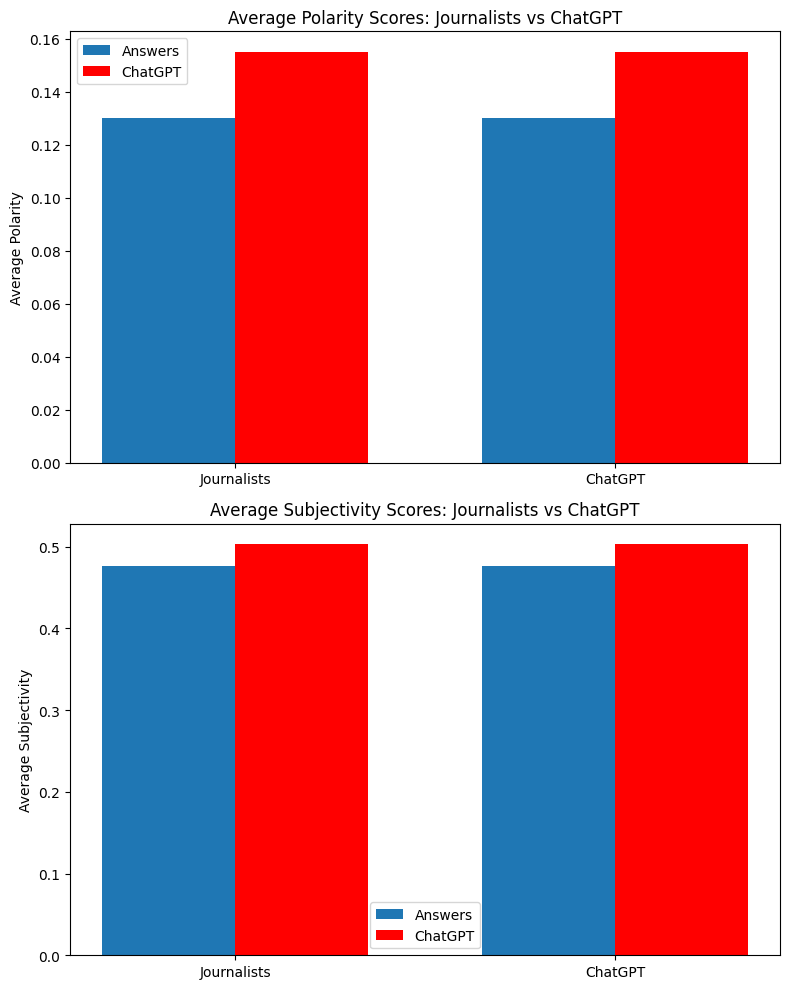

In [ ]:
#calculate average sentiment scores for 'answers' and 'chatgpt'
avg_answers_sentiment = SA_df[['answers_polarity', 'answers_subjectivity']].mean()
avg_chatgpt_sentiment = SA_df[['chatgpt_polarity', 'chatgpt_subjectivity']].mean()

#create a bar chart for average polarities
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

#bar chart for average polarities
labels = ['Journalists', 'ChatGPT']
bar_width = 0.35
index = range(len(labels))

ax1.bar(index, avg_answers_sentiment['answers_polarity'], bar_width, label='Answers')
ax1.bar([i + bar_width for i in index], avg_chatgpt_sentiment['chatgpt_polarity'], bar_width, label='ChatGPT', color='red')

ax1.set_ylabel('Average Polarity')
ax1.set_title('Average Polarity Scores: Journalists vs ChatGPT')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(labels)
ax1.legend()

#bar chart for average subjectivities
ax2.bar(index, avg_answers_sentiment['answers_subjectivity'], bar_width, label='Answers')
ax2.bar([i + bar_width for i in index], avg_chatgpt_sentiment['chatgpt_subjectivity'], bar_width, label='ChatGPT', color='red')

ax2.set_ylabel('Average Subjectivity')
ax2.set_title('Average Subjectivity Scores: Journalists vs ChatGPT')
ax2.set_xticks([i + bar_width / 2 for i in index])
ax2.set_xticklabels(labels)
ax2.legend()

plt.tight_layout()
plt.show()


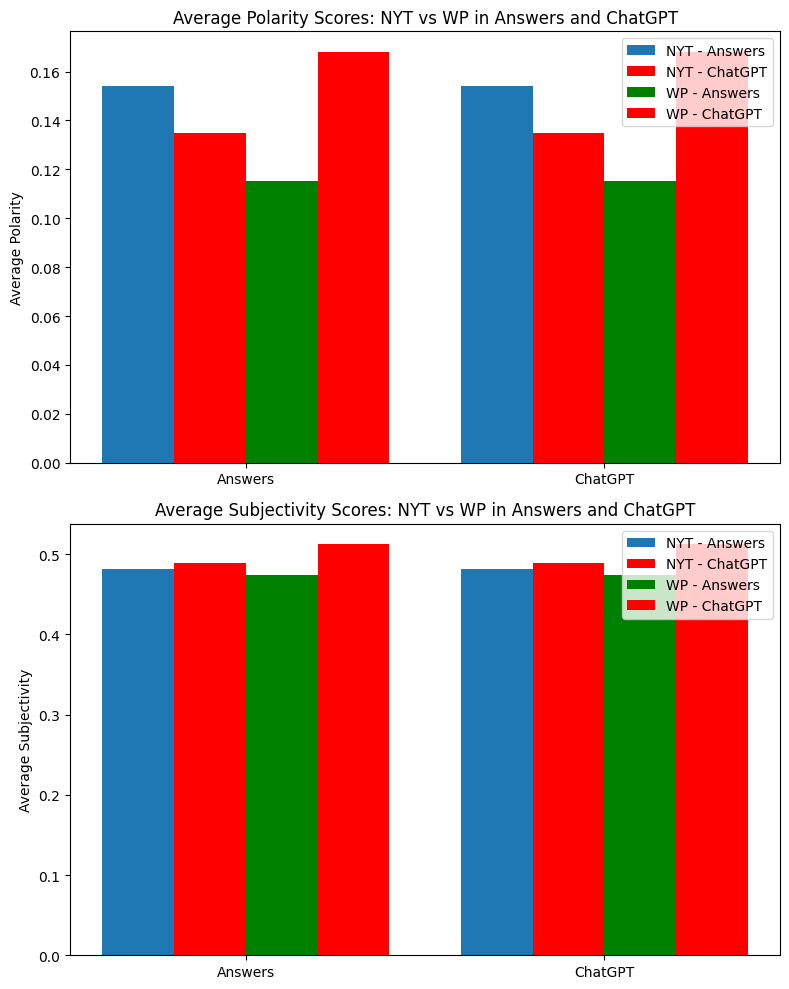

In [ ]:
#filter DataFrame for New York Times (NYT) and Washington Post (WP)
nyt_SA_df = SA_df[SA_df['source'] == 'NYT']
wp_SA_df = SA_df[SA_df['source'] == 'WP']

#calculate average sentiment scores for NYT and WP in 'answers' and 'chatgpt'
avg_nyt_answers_sentiment = nyt_SA_df[['answers_polarity', 'answers_subjectivity']].mean()
avg_nyt_chatgpt_sentiment = nyt_SA_df[['chatgpt_polarity', 'chatgpt_subjectivity']].mean()

avg_wp_answers_sentiment = wp_SA_df[['answers_polarity', 'answers_subjectivity']].mean()
avg_wp_chatgpt_sentiment = wp_SA_df[['chatgpt_polarity', 'chatgpt_subjectivity']].mean()

#create a detailed bar chart for sentiment analyses
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

#bar chart for average polarities
labels = ['Answers', 'ChatGPT']
bar_width = 0.2
index = range(len(labels))

ax1.bar(index, avg_nyt_answers_sentiment['answers_polarity'], bar_width, label='NYT - Answers')
ax1.bar([i + bar_width for i in index], avg_nyt_chatgpt_sentiment['chatgpt_polarity'], bar_width, label='NYT - ChatGPT', color='red')
ax1.bar([i + 2*bar_width for i in index], avg_wp_answers_sentiment['answers_polarity'], bar_width, label='WP - Answers', color='green')
ax1.bar([i + 3*bar_width for i in index], avg_wp_chatgpt_sentiment['chatgpt_polarity'], bar_width, label='WP - ChatGPT', color='red')

ax1.set_ylabel('Average Polarity')
ax1.set_title('Average Polarity Scores: NYT vs WP in Answers and ChatGPT')
ax1.set_xticks([i + 1.5*bar_width for i in index])
ax1.set_xticklabels(labels)
ax1.legend()

#bar chart for average subjectivities
ax2.bar(index, avg_nyt_answers_sentiment['answers_subjectivity'], bar_width, label='NYT - Answers')
ax2.bar([i + bar_width for i in index], avg_nyt_chatgpt_sentiment['chatgpt_subjectivity'], bar_width, label='NYT - ChatGPT', color='red')
ax2.bar([i + 2*bar_width for i in index], avg_wp_answers_sentiment['answers_subjectivity'], bar_width, label='WP - Answers', color='green')
ax2.bar([i + 3*bar_width for i in index], avg_wp_chatgpt_sentiment['chatgpt_subjectivity'], bar_width, label='WP - ChatGPT', color='red')

ax2.set_ylabel('Average Subjectivity')
ax2.set_title('Average Subjectivity Scores: NYT vs WP in Answers and ChatGPT')
ax2.set_xticks([i + 1.5*bar_width for i in index])
ax2.set_xticklabels(labels)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
#NER_df
ner_df = df.copy()
sentences = ner_df['answers'].astype(str)

In [ ]:
# Create an empty DataFrame to store person entities
person_df = pd.DataFrame(columns=['answers', 'a_person', 'chatgpt', 'gpt_person'])

# Iterate over sentences in both 'answers' and 'chatgpt'
for index, row in ner_df.iterrows():
    answers_persons = extract_people_entities(row['answers'])
    chatgpt_persons = extract_people_entities(row['chatgpt'])

    # Append results to the DataFrame
    person_df = pd.concat([person_df, pd.DataFrame({'answers': [row['answers']], 'a_person': [answers_persons], 'chatgpt': [row['chatgpt']], 'gpt_person': [chatgpt_persons]})], ignore_index=True)

# Display the resulting DataFrame
print("Person DataFrame:")
person_df

NameError: ignored

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


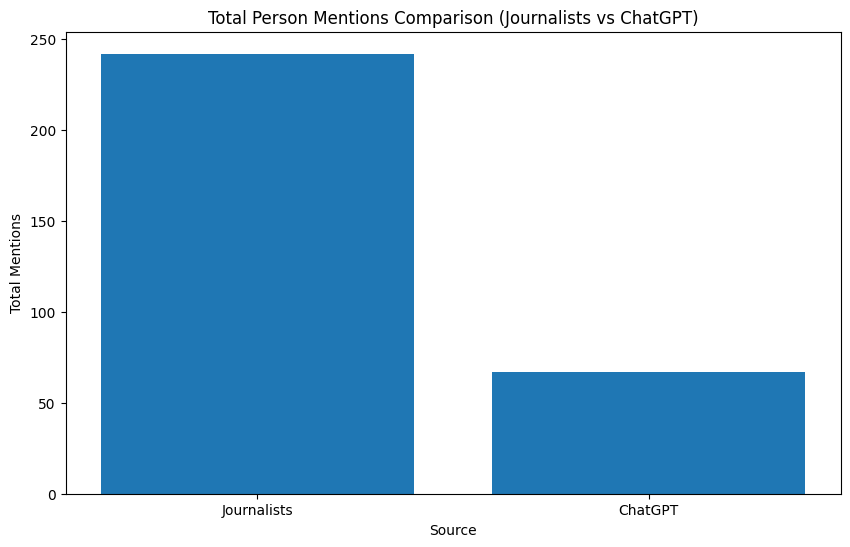

In [ ]:
import matplotlib.pyplot as plt

# Assuming person_df is your DataFrame with 'answers', 'a_person', 'chatgpt', and 'gpt_person' columns
# If your DataFrame has a different name, replace person_df with your actual DataFrame name

# Tally the total number of person mentions for 'answers' and 'chatgpt'
total_mentions_answers = person_df['a_person'].str.count(',') + 1
total_mentions_chatgpt = person_df['gpt_person'].str.count(',') + 1


# Draw bar chart for total mentions comparison
plt.figure(figsize=(10, 6))
plt.bar(['Journalists', 'ChatGPT'], [total_mentions_answers.sum(), total_mentions_chatgpt.sum()])
plt.title('Total Person Mentions Comparison (Journalists vs ChatGPT)')
plt.xlabel('Source')
plt.ylabel('Total Mentions')
plt.show()


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import names
from nltk.text import Text

nltk.download('names')
nltk.download('punkt')

# Ensure 'answers' column is converted to strings
ner_df['answers'] = ner_df['answers'].astype(str)

# Tokenize the text
tokens = word_tokenize(' '.join(ner_df['answers']))

# Identify human names using the NLTK names corpus
human_names = set(names.words())

# Filter tokens to include only human names
human_names_mentions = [name for name in tokens if name in human_names]

# Create a Text object for concordance
text_object = Text(tokens)

# Print concordance for human names
for name in human_names_mentions:
    print(f"Journalist Concordance for '{name}':")
    text_object.concordance(name, width=100)
    print("=" * 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Concordance for 'Arthur':
Displaying 3 of 3 matches:
 . I know that sounds corny , but it is true . Arthur Sulzberger Jr. , our publisher and chairman , 
 diversity of background and life experience . Arthur Sulzberger Jr. , our chairman and publisher , 
ur journalism . The Sulzberger family , led by Arthur Sulzberger Jr. , protects and expands our sing
Concordance for 'Web':
Displaying 25 of 26 matches:
, including NYTimes.com , the largest newspaper Web site , and the International Herald Tribune . I
rs in their twenties , prefers The Times on the Web . When I taught a class at Princeton in 2000 , 
nar all read The Times , but also mainly on the Web . Few turned on the network news . But they wer
s that will begin early next year . Through the Web we have all kinds of new tools to reach younger
sarily intending to read . But The Times on the Web is essential , too . I 've become addicted to o
very much part of our expanding audience on the Web . How News Affects Real People Your ques

In [ ]:
# Ensure 'answers' column is converted to strings
ner_df['chatgpt'] = ner_df['chatgpt'].astype(str)

# Tokenize the text
tokens = word_tokenize(' '.join(ner_df['chatgpt']))

# Identify human names using the NLTK names corpus
human_names = set(names.words())

# Filter tokens to include only human names
human_names_mentions = [name for name in tokens if name in human_names]

# Create a Text object for concordance
text_object = Text(tokens)

# Print concordance for human names
for name in human_names_mentions:
    print(f"ChatGPT Concordance for '{name}':")
    text_object.concordance(name, width=100)
    print("=" * 10)

ChatGPT Concordance for 'Dorit':
Displaying 1 of 1 matches:
er into the substance of the accomplishments . Dorit Beinish 's appointment as the first woman pres
ChatGPT Concordance for 'Israel':
Displaying 5 of 5 matches:
's appointment as the first woman president of Israel 's Supreme Court undoubtedly marks a historic 
 desire for the `` destruction of the state of Israel , '' interpretations may vary . For Israelis a
 sense , implying a threat to the existence of Israel and its people . On the other hand , when Pale
ct . The phrase `` destruction of the state of Israel '' is indeed a loaded one , with interpretatio
et it as a call for the literal destruction of Israel , others argue it signifies a rejection of the
ChatGPT Concordance for 'Marcela':
Displaying 1 of 1 matches:
mpact they bring to their respective fields . Marcela , your concern is a valid one , and it reflec
ChatGPT Concordance for 'Judith':
Displaying 1 of 1 matches:
wsroom . The instances you mentioned , such as Judi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#hedge words
# list of 150 hedge words from https://github.com/words/hedges/blob/main/data.txt
hedge_words = [
    'largely', 'generally', 'often', 'rarely', 'sometimes', 'frequently', 'occasionally', 'seldom', 'usually',
    'most', 'several', 'some', 'almost', 'practically', 'apparently', 'virtually', 'basically', 'approximately',
    'roughly', 'somewhat', 'somehow', 'partially', 'actually', 'like', 'something', 'someone', 'somebody',
    'somewhere', 'think', 'thinks', 'thought', 'believe', 'believed', 'believes', 'consider', 'considers',
    'considered', 'assume', 'assumes', 'assumed', 'understand', 'understands', 'understood', 'find', 'found',
    'finds', 'appear', 'appears', 'appeared', 'seem', 'seems', 'seemed', 'suppose', 'supposes', 'supposed',
    'guess', 'guesses', 'guessed', 'estimate', 'estimates', 'estimated', 'speculate', 'speculates', 'speculated',
    'suggest', 'suggests', 'suggested', 'may', 'could', 'should', 'might', 'surely', 'probably', 'likely', 'maybe',
    'perhaps', 'unsure', 'probable', 'unlikely', 'possibly', 'possible', 'read', 'say', 'says', 'looks like',
    'look like', "don't know", 'necessarily', 'kind of', 'much', 'bunch', 'couple', 'few', 'little', 'really',
    'and all that', 'and so forth', 'et cetera', 'in my mind', 'in my opinion', 'their impression', 'my impression',
    'in my understanding', 'my thinking is', 'my understanding is', 'in my view', "if i'm understanding you correctly",
    'something or other', 'so far', 'at least', 'about', 'around', 'can', 'effectively', 'evidently', 'fairly',
    'hopefully', 'in general', 'mainly', 'more or less', 'mostly', 'overall', 'presumably', 'pretty strong', 'pretty weak',
    'pretty', 'quite clearly', 'quite', 'rather', 'sort of', 'supposedly', 'tend', 'appear to be', 'doubt', 'be sure',
    'indicate', 'will', 'must', 'would', 'certainly', 'definitely', 'clearly', 'conceivably', 'certain', 'definite',
    'clear', 'assumption', 'possibility', 'probability', 'many', 'almost never', 'improbable', 'always', 'rare',
    'consistent with', 'doubtful', 'suggestive', 'diagnostic', 'inconclusive', 'apparent', 'alleged', 'allege', 'a bit',
    'presumable'
]

# Function to count occurrences of hedge words in a given text
def count_hedge_words(text):
    return sum(1 for word in hedge_words if word.lower() in text.lower())

# Count hedge words occurrences in 'answers' and 'chatgpt' columns
SA_df['answers_hedge_count'] = SA_df['answers'].apply(count_hedge_words)
SA_df['chatgpt_hedge_count'] = SA_df['chatgpt'].apply(count_hedge_words)

# Display the DataFrame with hedge word counts
print(SA_df[['answers', 'answers_hedge_count', 'chatgpt', 'chatgpt_hedge_count']])


                                              answers  answers_hedge_count  \
0     Budget cuts are a sad reality in most newsro...                   16   
1      I share some of your worry, in large part b...                   20   
2     Your question is such an interesting one. I ...                   20   
3     The political winds do not influence how we ...                    3   
4      The Times still sees its daily mission as d...                   20   
5     As a "first woman" (Times managing editor an...                   13   
6     You spell out many of the true differences b...                    9   
7     The relationships are close and getting clos...                    6   
8     These two questions illustrate a reality: po...                   10   
9     I know from my years in Washington, through ...                   14   
10    It certainly is an issue we cover with great...                    5   
11     I've combined two questions that speak to t...           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Total hedge count for 'answers' column
total_answers_hedge_count = SA_df['answers_hedge_count'].sum()

# Total hedge count for 'chatgpt' column
total_chatgpt_hedge_count = SA_df['chatgpt_hedge_count'].sum()

# Display the total hedge counts
print(f"Total Hedge Count in 'answers' column: {total_answers_hedge_count}")
print(f"Total Hedge Count in 'chatgpt' column: {total_chatgpt_hedge_count}")


Total Hedge Count in 'answers' column: 918
Total Hedge Count in 'chatgpt' column: 492


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


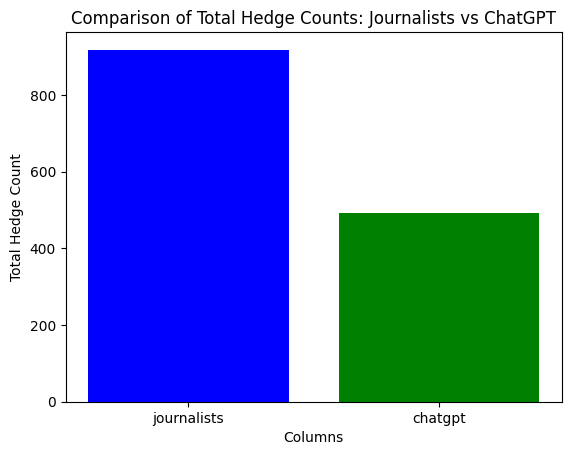

In [ ]:
plt.bar(['journalists', 'chatgpt'], [total_answers_hedge_count, total_chatgpt_hedge_count], color=['blue', 'green'])
plt.xlabel('Columns')
plt.ylabel('Total Hedge Count')
plt.title('Comparison of Total Hedge Counts: Journalists vs ChatGPT')
plt.show()

In [ ]:
#topic modelling
!pip install pyLDAvis==2.1.2
import numpy as np
from __future__ import print_function
import pyLDAvis
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import os
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=4280769c6c102146b942b6b4f067d09a768c0760bc9c49409f55ddbed748364f
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
topic_df = df.copy()

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                min_df = 2, max_df=0.75)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#using NMF because of the brevity of the responses, and for a more consistent result
#TF
nmf_tf = NMF(n_components=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#start with journalist's answers
doc = topic_df.answers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def from_sklearn(docs,vect,lda,**kwargs):

    """Create Prepared Data from sklearn's vectorizer and Latent Dirichlet
    Application

    Parameters
    ----------
    docs : Pandas Series.
        Documents to be passed as an input.
    vect : Scikit-Learn Vectorizer (CountVectorizer,TfIdfVectorizer).
        vectorizer to convert documents into matrix sparser
    lda  : sklearn.decomposition.LatentDirichletAllocation.
        Latent Dirichlet Allocation

    **kwargs: Keyword argument to be passed to pyLDAvis.prepare()


    Returns
    -------
    prepared_data : PreparedData
    """

    norm = lambda data: pd.DataFrame(data).div(data.sum(1),axis=0).values

    vected = vect.fit_transform(docs)
    doc_topic_dists = norm(lda.fit_transform(vected))

    prepared = pyLDAvis.prepare(
                        doc_lengths = docs.str.len(),
                        vocab = vect.get_feature_names_out(),
                        term_frequency = vected.sum(axis=0).tolist()[0],
                        topic_term_dists = norm(lda.components_),
                        doc_topic_dists = doc_topic_dists,
                        **kwargs)

    return prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from_sklearn(doc, tf_vectorizer, nmf_tf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.294509 -0.124121       1        1  34.331235
0      0.001623  0.083562       2        1  29.000666
3      0.069652  0.028417       3        1  20.678730
4      0.023391  0.232905       4        1   8.576975
2      0.199843 -0.220762       5        1   7.412395, topic_info=         Term         Freq        Total Category  logprob  loglift
550      food   976.000000   976.000000  Default  30.0000  30.0000
1368     test   709.000000   709.000000  Default  29.0000  29.0000
1408   travel  2208.000000  2208.000000  Default  28.0000  28.0000
1388    times  1597.000000  1597.000000  Default  27.0000  27.0000
50    airline  1059.000000  1059.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
412       don    78.538401   562.190143   Topic5  -4.9550   0.6338
1204     says    83.606038  1247.757135   Topic5  -4.8925  -0.1010
1079  quality    72.333446   323.503481   Topic5  -5.0373   1.1041
580     going    72.052692   424.505771   Topic5  -5.0412   0.8285
343       day    71.780034   507.855622   Topic5  -5.0450   0.6454

[372 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         2  1.000189         aaa
6         2  1.006028    accident
20        2  1.010387  additional
29        1  0.012124      advice
29        2  0.509202      advice
...     ...       ...         ...
1541      1  0.630057       years
1541      2  0.183767       years
1541      3  0.099759       years
1541      4  0.076132       years
1541      5  0.007876       years

[719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

In [ ]:
#display journo answer topics
display_topics(nmf_tf, tf_vectorizer.get_feature_names_out(), 10)

Topic 0:
travel says trip said coronavirus people pandemic new travelers tour
Topic 1:
times news journalism stories new web readers reporters story reporting
Topic 2:
food said safety airline airlines eat fda report know including
Topic 3:
airline flight said refund airlines time agent gate don case
Topic 4:
test travel testing results united states home coronavirus travelers covid


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Human journalist topic vocabulary often overlapped, difficult to discern.

# Topic 0 general travel advice during covid:
# travel says trip said coronavirus people pandemic new travelers tour

# Topic 1 journalism:
# times news journalism stories new web readers reporters story reporting

# Topic 2 food and travel:
#food said safety airline airlines eat fda report know including

# Topic 3 covid-19 flight disruptions :
#airline flight said refund airlines time agent gate don case

#Topic 4 US-based travel regulations & changes:
#test travel testing results united states home coronavirus travelers covid

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: ignored

In [ ]:
#now check chatgpt
doc = topic_df.chatgpt
#using NMF because of the brevity of the responses, and for a more consistent result
#TF
nmf_tf = NMF(n_components=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from_sklearn(doc, tf_vectorizer, nmf_tf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.279944 -0.126908       1        1  32.736578
3     -0.041338 -0.117275       2        1  18.517267
5     -0.158787  0.254771       3        1  16.358189
4      0.107668  0.056176       4        1  15.898744
1      0.157964 -0.147815       5        1   9.754971
2      0.214438  0.081051       6        1   6.734251, topic_info=           Term         Freq        Total Category  logprob  loglift
943     testing   594.000000   594.000000  Default  30.0000  30.0000
205     cooking   481.000000   481.000000  Default  29.0000  29.0000
971      travel   721.000000   721.000000  Default  28.0000  28.0000
960       times  1104.000000  1104.000000  Default  27.0000  27.0000
958        time   480.000000   480.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
489    informed    54.981724   252.189596   Topic6  -4.5589   1.1748
833        safe    47.302742   151.238990   Topic6  -4.7093   1.5357
620  navigating    46.518599   202.849137   Topic6  -4.7260   1.2254
739     provide    46.715438   256.843526   Topic6  -4.7218   0.9936
581        make    43.402958   197.307308   Topic6  -4.7954   1.1837

[368 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
4         3  0.034275  accommodate
4         4  0.051412  accommodate
4         5  0.908280  accommodate
6         4  1.000417      account
15        1  0.994540     actively
...     ...       ...          ...
1037      2  0.278415      willing
1037      4  0.041762      willing
1037      5  0.682117      willing
1048      1  1.000993         york
1049      1  0.991314      younger

[770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 5, 2, 3])

In [ ]:
#display gpt answer topics
display_topics(nmf_tf, tf_vectorizer.get_feature_names_out(), 10)

Topic 0:
times new york journalism digital news landscape media readers reporting
Topic 1:
airline airlines policies passengers options flight rebooking travel specific conditions
Topic 2:
testing health cost process language covid ensure local information online
Topic 3:
concerns communication airbnb understanding circumstances open challenges consider support especially
Topic 4:
travel like insurance coverage child plans experience account additionally safety
Topic 5:
cooking time pan consider process culinary happy bit perfectly space


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#ChatGPT topic vocabularly comparatively siloed to its domains.

#Topic 0 journalism:
# times new york journalism digital news landscape media readers reporting

#Topic 1 airline policy & accomodations:
#airline airlines policies passengers options flight rebooking travel specific conditions

#Topic 2 covid testing:
#testing health cost process language covid ensure local information online

#Topic 3 communications/problem-solving:
#concerns communication airbnb understanding circumstances open challenges consider support especially

#Topic 4 safe travels:
#travel like insurance coverage child plans experience account additionally safety

#Topic 5 leisure & cooking:
#cooking time pan consider process culinary happy bit perfectly space

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: ignored